# Analyzing the Steel Plant Faults with Decision Trees

## Context

Welcome to the **Scaler Industrial** Development data analysis team! Our current project aims to improve the quality control process in steel manufacturing. Your expertise is requested to analyze the Steel Plant Faults dataset, utilizing Decision Trees to classify different types of steel plate faults. This task will help in automating the identification of defects and ensuring high standards in steel production.

## Dataset Description

The dataset you will analyze includes a variety of attributes that describe defects found in steel plates. These defects are classified into seven distinct categories, each representing a specific type of fault:

### Steel Plate Fault Types:
1. **Pastry:** Small patches or irregularities on the surface of the steel plate.
2. **Z_Scratch:** Narrow, parallel scratches or marks in the direction of rolling.
3. **K_Scratch:** Scratches similar to Z-scratches, but perpendicular to the rolling direction.
4. **Stains:** Discolored or contaminated areas on the steel surface.
5. **Dirtiness:** Presence of dirt or particulate matter on the steel surface.
6. **Bumps:** Raised or protruding areas on the steel surface.
7. **Other_Faults:** A broad category for faults not specifically mentioned in the other types.


In [80]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, cross_validate

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

import scipy.stats as stats

In [38]:
df = pd.read_csv('./../data/SteelPlant.csv')
df.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  int64  
 1   X_Minimum              19219 non-null  int64  
 2   X_Maximum              19219 non-null  int64  
 3   Y_Minimum              19219 non-null  int64  
 4   Y_Maximum              19219 non-null  int64  
 5   Pixels_Areas           19219 non-null  int64  
 6   X_Perimeter            19219 non-null  int64  
 7   Y_Perimeter            19219 non-null  int64  
 8   Sum_of_Luminosity      19219 non-null  int64  
 9   Minimum_of_Luminosity  19219 non-null  int64  
 10  Maximum_of_Luminosity  19219 non-null  int64  
 11  Length_of_Conveyer     19219 non-null  int64  
 12  TypeOfSteel_A300       19219 non-null  int64  
 13  TypeOfSteel_A400       19219 non-null  int64  
 14  Steel_Plate_Thickness  19219 non-null  int64  
 15  Ed

In [15]:
fault_types = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
df[fault_types]

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
19214,0,0,0,1,0,0,0
19215,0,0,0,0,0,0,1
19216,1,0,0,0,0,0,0
19217,0,0,0,0,0,0,1


Text(0.5, 1.0, 'differnet fault types')

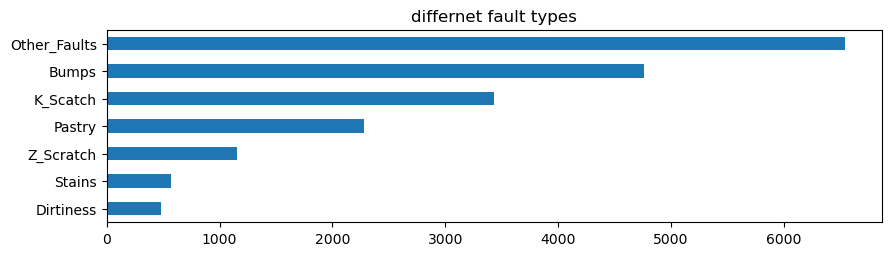

In [42]:
df['Target'] = df[fault_types].idxmax(axis=1)
plt.figure(figsize=(10, 2.5))
df['Target'].value_counts()[::-1].plot(kind='barh')
plt.title('differnet fault types')

In [45]:
y = df.Target
X = df.drop(columns=['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults', 'Target'])

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((14414, 28), (4805, 28), (14414,), (4805,))

              precision    recall  f1-score   support

       Bumps       0.39      0.39      0.39      1162
   Dirtiness       0.13      0.11      0.12       129
    K_Scatch       0.83      0.81      0.82       868
Other_Faults       0.39      0.41      0.40      1589
      Pastry       0.24      0.23      0.24       620
      Stains       0.59      0.57      0.58       134
   Z_Scratch       0.43      0.39      0.41       303

    accuracy                           0.45      4805
   macro avg       0.43      0.42      0.42      4805
weighted avg       0.45      0.45      0.45      4805



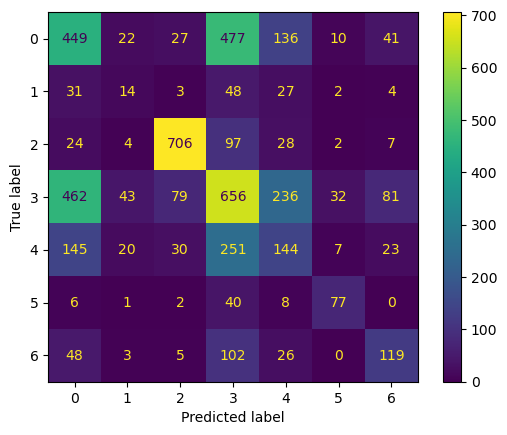

In [65]:
tree = DecisionTreeClassifier(class_weight= "balanced", random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print(classification_report(y_pred, y_test))

cm = confusion_matrix(y_pred, y_test)
ConfusionMatrixDisplay(cm).plot()


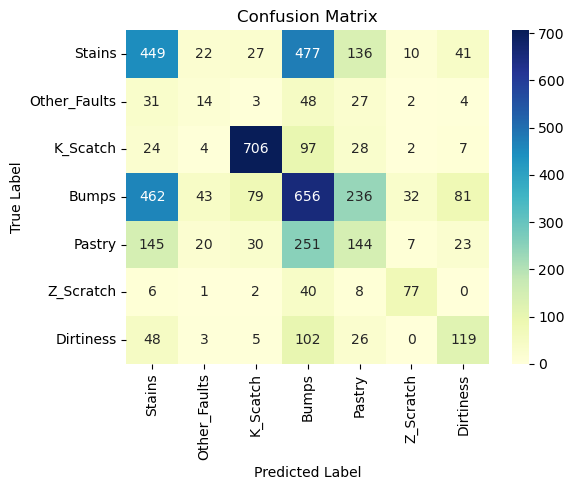

In [73]:
class_names = df.Target.unique()
plt.figure(figsize=(6, 5), tight_layout=True)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',  cbar=True,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [81]:
tree_depths = [1, 2, 3, 5, 7, 11, 13, 15, 19, 20, 25, 30] 
scores_training = []
scores_validation = []

for depth in tree_depths:
    model = DecisionTreeClassifier(random_state=42, max_depth=depth, class_weight='balanced')
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_acc_results = cross_validate(model, X_train, y_train, cv=kfold, scoring='accuracy', return_train_score=True)
    
    print(f"K-Fold for depth: {depth} - Accuracy Mean: Train: {cv_acc_results['train_score'].mean() * 100:.2f}%, Validation: {cv_acc_results['test_score'].mean() * 100:.2f}%")
    print(f"K-Fold for depth: {depth} - Accuracy Std: Train: {cv_acc_results['train_score'].std() * 100:.2f}%, Validation: {cv_acc_results['test_score'].std() * 100:.2f}%")
    print('***************')

    scores_training.append(cv_acc_results['train_score'].mean())
    scores_validation.append(cv_acc_results['test_score'].mean())


K-Fold for depth: 1 - Accuracy Mean: Train: 18.28%, Validation: 18.25%
K-Fold for depth: 1 - Accuracy Std: Train: 0.13%, Validation: 1.14%
***************
K-Fold for depth: 2 - Accuracy Mean: Train: 21.02%, Validation: 20.76%
K-Fold for depth: 2 - Accuracy Std: Train: 1.43%, Validation: 1.32%
***************
K-Fold for depth: 3 - Accuracy Mean: Train: 42.29%, Validation: 42.19%
K-Fold for depth: 3 - Accuracy Std: Train: 0.32%, Validation: 1.25%
***************
K-Fold for depth: 5 - Accuracy Mean: Train: 50.11%, Validation: 49.67%
K-Fold for depth: 5 - Accuracy Std: Train: 1.49%, Validation: 1.45%
***************
K-Fold for depth: 7 - Accuracy Mean: Train: 46.70%, Validation: 44.65%
K-Fold for depth: 7 - Accuracy Std: Train: 0.83%, Validation: 1.41%
***************
K-Fold for depth: 11 - Accuracy Mean: Train: 57.57%, Validation: 46.70%
K-Fold for depth: 11 - Accuracy Std: Train: 0.65%, Validation: 0.88%
***************
K-Fold for depth: 13 - Accuracy Mean: Train: 65.73%, Validation: 48.

In [82]:
tree_depths = [1, 2, 3, 5, 7, 11, 13, 15, 19, 20, 25, 30] 
scores_training = []
scores_validation = []

for depth in tree_depths:
    model = DecisionTreeClassifier(random_state=42, max_depth=depth, class_weight='balanced')
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_acc_results = cross_validate(model, X_train, y_train, n_jobs=-1, cv=kfold, return_train_score=True, scoring='accuracy')
    
    print(f"K-Fold for depth: {depth} - Accuracy Mean: Train: {cv_acc_results['train_score'].mean() * 100:.2f}%, Validation: {cv_acc_results['test_score'].mean() * 100:.2f}%")
    print(f"K-Fold for depth: {depth} - Accuracy Std: Train: {cv_acc_results['train_score'].std() * 100:.2f}%, Validation: {cv_acc_results['test_score'].std() * 100:.2f}%")
    print('***************')

    scores_training.append(cv_acc_results['train_score'].mean())
    scores_validation.append(cv_acc_results['test_score'].mean())

K-Fold for depth: 1 - Accuracy Mean: Train: 18.28%, Validation: 18.25%
K-Fold for depth: 1 - Accuracy Std: Train: 0.13%, Validation: 1.14%
***************
K-Fold for depth: 2 - Accuracy Mean: Train: 21.02%, Validation: 20.76%
K-Fold for depth: 2 - Accuracy Std: Train: 1.43%, Validation: 1.32%
***************
K-Fold for depth: 3 - Accuracy Mean: Train: 42.29%, Validation: 42.19%
K-Fold for depth: 3 - Accuracy Std: Train: 0.32%, Validation: 1.25%
***************
K-Fold for depth: 5 - Accuracy Mean: Train: 50.11%, Validation: 49.67%
K-Fold for depth: 5 - Accuracy Std: Train: 1.49%, Validation: 1.45%
***************
K-Fold for depth: 7 - Accuracy Mean: Train: 46.70%, Validation: 44.65%
K-Fold for depth: 7 - Accuracy Std: Train: 0.83%, Validation: 1.41%
***************
K-Fold for depth: 11 - Accuracy Mean: Train: 57.57%, Validation: 46.70%
K-Fold for depth: 11 - Accuracy Std: Train: 0.65%, Validation: 0.88%
***************
K-Fold for depth: 13 - Accuracy Mean: Train: 65.73%, Validation: 48.

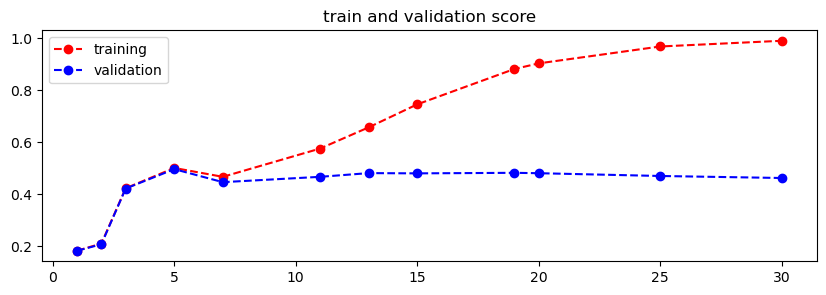

In [108]:
plt.figure(figsize=(10, 3))
plt.plot(tree_depths, scores_training, label='training', linestyle='dashed',marker='o', color='red' )
plt.plot(tree_depths, scores_validation, label='validation', linestyle='dashed',marker='o', color='blue' )
plt.title('train and validation score')
plt.legend()

              precision    recall  f1-score   support

       Bumps       0.52      0.45      0.48      1366
   Dirtiness       0.47      0.12      0.19       419
    K_Scatch       0.87      0.91      0.89       814
Other_Faults       0.36      0.44      0.40      1352
      Pastry       0.16      0.32      0.21       304
      Stains       0.79      0.61      0.69       169
   Z_Scratch       0.66      0.48      0.55       381

    accuracy                           0.50      4805
   macro avg       0.55      0.47      0.49      4805
weighted avg       0.53      0.50      0.50      4805



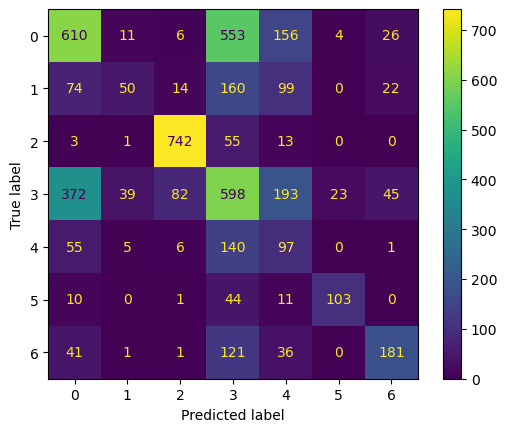

In [111]:
best_tree = DecisionTreeClassifier(random_state=42, max_depth=5, class_weight='balanced')
best_tree.fit(X_train, y_train)
y_pred = best_tree.predict(X_test)
print(classification_report(y_pred, y_test))

cm = confusion_matrix(y_pred, y_test)
ConfusionMatrixDisplay(cm).plot()

Text(0.5, 1.0, 'Feature importance')

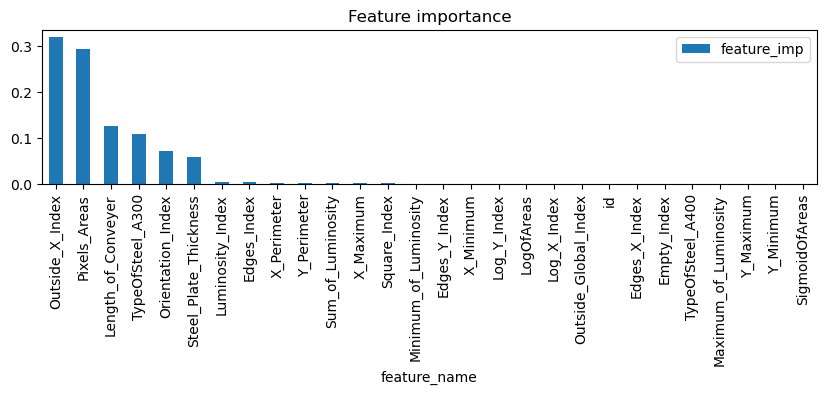

In [113]:
feature_imp = pd.DataFrame({'feature_imp':best_tree.feature_importances_, 'feature_name': best_tree.feature_names_in_})
feature_imp.sort_values('feature_imp', ascending=False).set_index('feature_name').plot(kind='bar', figsize=(10, 2))
plt.title('Feature importance')